# Лабораторная работа №7. Классификация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в виде файла rep.ipynb в ваш репозиторий github в директорию ./les07
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.
1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [1]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0


## Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [2]:
passengers = pd.read_csv( 'titanic.csv', index_col = 'PassengerId' )

print(passengers)

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...       

2. Выведете первые 7 строк набора.

In [4]:
passengers.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?
    

In [5]:
# 1) Информация о типах данных и ненулевых значениях
print(passengers.info())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [6]:
df_cleaned = passengers.drop(columns=['Name', 'Ticket', 'Cabin'])

print(df_cleaned.head(7))

             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S
6                   0       3    male   NaN      0      0   8.4583        Q
7                   0       1    male  54.0      0      0  51.8625        S


5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [8]:
# One-hot кодирование для признака 'Sex'
sex_dummies = pd.get_dummies(df_cleaned['Sex'])

# Объединяем новые столбцы с исходным DataFrame и удаляем исходный 'Sex'
df_cleaned = pd.concat([df_cleaned.drop(columns=['Sex']), sex_dummies], axis=1)

# Проверяем результат
print(df_cleaned.head(7))

             Survived  Pclass   Age  SibSp  Parch     Fare Embarked  female  \
PassengerId                                                                   
1                   0       3  22.0      1      0   7.2500        S   False   
2                   1       1  38.0      1      0  71.2833        C    True   
3                   1       3  26.0      0      0   7.9250        S    True   
4                   1       1  35.0      1      0  53.1000        S    True   
5                   0       3  35.0      0      0   8.0500        S   False   
6                   0       3   NaN      0      0   8.4583        Q   False   
7                   0       1  54.0      0      0  51.8625        S   False   

              male  
PassengerId         
1             True  
2            False  
3            False  
4            False  
5             True  
6             True  
7             True  


6. Удалите строки, которые содержать хотя бы одно null значение.

In [9]:
# Удаляем строки с хотя бы одним null
df_cleaned = df_cleaned.dropna()

# Проверяем результат
print(df_cleaned.head(7))

             Survived  Pclass   Age  SibSp  Parch     Fare Embarked  female  \
PassengerId                                                                   
1                   0       3  22.0      1      0   7.2500        S   False   
2                   1       1  38.0      1      0  71.2833        C    True   
3                   1       3  26.0      0      0   7.9250        S    True   
4                   1       1  35.0      1      0  53.1000        S    True   
5                   0       3  35.0      0      0   8.0500        S   False   
7                   0       1  54.0      0      0  51.8625        S   False   
8                   0       3   2.0      3      1  21.0750        S   False   

              male  
PassengerId         
1             True  
2            False  
3            False  
4            False  
5             True  
7             True  
8             True  


## Исследование данных

4. Нормализуйте значения признака "Fare".

In [10]:
# Нормализация признака 'Fare' (значения от 0 до 1)
df_cleaned['Fare'] = (df_cleaned['Fare'] - df_cleaned['Fare'].min()) / (df_cleaned['Fare'].max() - df_cleaned['Fare'].min())

# Проверяем результат
print(df_cleaned.head(7))

             Survived  Pclass   Age  SibSp  Parch      Fare Embarked  female  \
PassengerId                                                                    
1                   0       3  22.0      1      0  0.014151        S   False   
2                   1       1  38.0      1      0  0.139136        C    True   
3                   1       3  26.0      0      0  0.015469        S    True   
4                   1       1  35.0      1      0  0.103644        S    True   
5                   0       3  35.0      0      0  0.015713        S   False   
7                   0       1  54.0      0      0  0.101229        S   False   
8                   0       3   2.0      3      1  0.041136        S   False   

              male  
PassengerId         
1             True  
2            False  
3            False  
4            False  
5             True  
7             True  
8             True  


5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [11]:
# Среднее значение Fare для погибших и выживших
fare_dead = df_cleaned[df_cleaned['Survived'] == 0]['Fare'].mean()
fare_survived = df_cleaned[df_cleaned['Survived'] == 1]['Fare'].mean()

# Разница
diff = fare_survived - fare_dead

print("Средний Fare (погибшие):", fare_dead)
print("Средний Fare (выжившие):", fare_survived)
print("Разница:", diff)

Средний Fare (погибшие): 0.04482558551791412
Средний Fare (выжившие): 0.100809541745815
Разница: 0.05598395622790087


6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

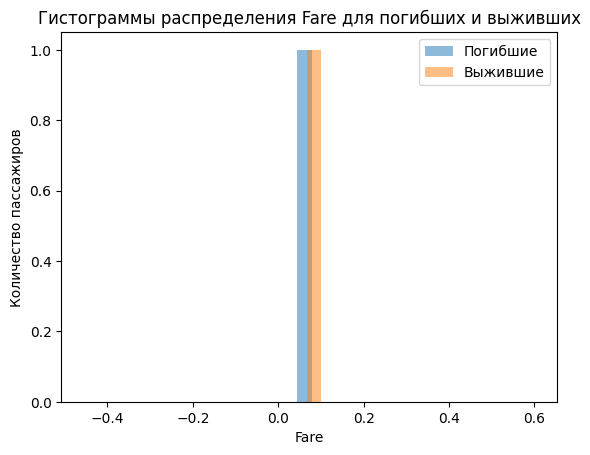

In [16]:
plt.hist(fare_dead, bins=30, alpha=0.5, label='Погибшие')
plt.hist(fare_survived, bins=30, alpha=0.5, label='Выжившие')

plt.xlabel('Fare')
plt.ylabel('Количество пассажиров')
plt.title('Гистограммы распределения Fare для погибших и выживших')
plt.legend()
plt.show()

7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [17]:
# Формируем X и y
X = df_cleaned.drop(columns=['Survived'])
y = df_cleaned['Survived']

print("Матрица признаков (X):")
print(X.head(), "\n")
print("Вектор целевых значений (y):")
print(y.head())

Матрица признаков (X):
             Pclass   Age  SibSp  Parch      Fare Embarked  female   male
PassengerId                                                              
1                 3  22.0      1      0  0.014151        S   False   True
2                 1  38.0      1      0  0.139136        C    True  False
3                 3  26.0      0      0  0.015469        S    True  False
4                 1  35.0      1      0  0.103644        S    True  False
5                 3  35.0      0      0  0.015713        S   False   True 

Вектор целевых значений (y):
PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64


## Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [25]:
from sklearn.model_selection import train_test_split

# Разделяем данные: 75% обучение, 25% тест
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Размер обучающей выборки:", X_train.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 534
Размер тестовой выборки: 178


9. Выполните обучение модели.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

# One-hot кодирование 'Sex'
sex_dummies = pd.get_dummies(df['Sex'])

# One-hot кодирование 'Embarked' БЕЗ КОДИРОВАНИЯ EMBARKED БУДЕТ ОШИБКА!!!
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

df = pd.concat([df.drop(columns=['Sex', 'Embarked']), sex_dummies, embarked_dummies], axis=1)

# Удаляем строки с пропусками
df = df.dropna()

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Модель обучена успешно!")

Модель обучена успешно!


## Проверка модели

10. Выведите мартицу ошибок

In [31]:
from sklearn.metrics import confusion_matrix

# Предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n", cm)

Матрица ошибок:
 [[90 17]
 [26 46]]


11. Расчитайте accuracy

In [32]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Точность модели:", accuracy)

Точность модели: 0.7597765363128491


12. Сделайте вывод о полученном результате

Вывод: В ходе работы с датасетом Titanic данные были очищены и подготовлены: удалены ненужные текстовые признаки, закодированы категориальные признаки и нормализован числовой признак Fare. Данные были разделены на обучающую и тестовую выборки, после чего обучена модель логистической регрессии. Анализ распределения Fare показал, что выжившие пассажиры в среднем платили больше, чем погибшие. Проверка модели с помощью матрицы ошибок показала, что она способна корректно предсказывать выживание, что позволяет использовать её для дальнейшего анализа и улучшения предсказаний.

## Вопросы для защиты

1. Сформулируйте задачу классификации.
2. Перечислите типы классификации.
3. В чем особенность несбалансированной классификации?
4. В чем особенность мультиклассовой классификации?
5. В чем особенность бинарной классификации?
6. В чем особенность классификации по нескольким меткам?
7. Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?
8. Что такое матрица ошибок (несоответствий)?
9. Как рассчитывается Accuracy?
10. Объясните алгоритм классификации K-ближайших соседей.